In [1]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

import pickle
import pathlib
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-colorblind')

import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
fmt = ['-o', '-^', '-v', '-d', '-D', '-s', '-X', '-+', '-x', '-p', '-8', 
       '-.', '-*',
       '-*', '-h', '-|', '-o']
# ['-o', '-v', 's', 'p', '-D', '-d']
# color = {
#     'CE (EoT)': 'green',
#     'CE (softmax)': ,
#     'CE (logits)': ,
#     'Linear (logits)': ,
# }
# from matplotlib.pyplot import cm
# color = list(cm.get_cmap('Set2')(np.linspace(0, 1, 10)))[1:]

from matplotlib.colors import ListedColormap
color = ListedColormap(sns.color_palette('colorblind', 15).as_hex())
color = color(np.linspace(0, 1, 15))
color[10] = [1, 0, 0, 1]
sns.color_palette('colorblind', 15)

/datadrive/chawins/miniconda3/envs/apb/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784),
 (0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844)]

In [2]:
MAPILLARY_LABEL_COUNTS_DICT = {
    "Circle": 18144,
    "Triangle": 1473,
    "Upside-down triangle": 1961,
    "Diamond (S)": 1107,
    "Diamond (L)": 3539,
    "Square": 1898,
    "Rectangle (S)": 1580,
    "Rectangle (M)": 839,
    "Rectangle (L)": 638,
    "Pentagon": 204,
    "Octagon": 1001,
}
LABELS = list(MAPILLARY_LABEL_COUNTS_DICT.keys())
LABELS_WITH_AVG = [*LABELS, "Avg.", "Weighted Avg."]

MARKERS = {
    "Circle": "-o",
    "Triangle": "-^",
    "Upside-down triangle": "-v",
    "Diamond (S)": "-d",
    "Diamond (L)": "-D",
    "Square": "-s",
    "Rectangle (S)": "-X",
    "Rectangle (M)": "-P",
    "Rectangle (L)": "-s",
    "Pentagon": "-p",
    "Octagon": "-8",
    "Avg.": "-.",
    "Weighted Avg.": "-*",
}


In [6]:
base_dir = pathlib.Path("./detectron_output/")

path = base_dir / "no_patch"
for sign_path in path.iterdir():
    result_path = list(sign_path.glob("*/*.pkl"))
    if not result_path:
        continue
    result_path = result_path[0]
    # print(result_path)
    with open(result_path, "rb") as f:
        results = pickle.load(f)

    if "all" in str(result_path):
        scores = results["bbox"]["gtScores"]
        print("======= real =======")
        for c in scores:
            mean = scores[c][0].mean()
            print(c, mean)
        print("======= real =======")
    else:
        scores = results["bbox"]["syn_scores"] * results["bbox"]["syn_matches"]
        mean = scores.mean()
        # print(results['obj_class'], mean)
        print(f"{results['obj_class']}, {mean},")


KeyError: 'gtScores'

In [3]:
results = {
    "syn-syn-10x10-obj_size": {
        #         "real": [
        #             7.4,
        # 18.8,
        # 0.8,
        # 71.2,
        # 3.2,
        # 21.6,
        # 54.1,
        # 24.5,
        # 6.6,
        # 1.4,
        # 1.8,
        # 19.2,
        # 11.8,
        #         ],
        "32": [
            64.2,
            91.6,
            10.6,
            99.0,
            32.5,
            100.0,
            100.0,
            45.6,
            85.1,
            24.0,
            78.9,
            66.5,
            64.5,
        ],
        "48": [
            23.2,
            86.4,
            7.9,
            97.0,
            43.9,
            99.9,
            100.0,
            79.3,
            62.7,
            0.0,
            40.1,
            58.2,
            41.7,
        ],
        "64": [
            69.3,
            95.2,
            5.4,
            98.9,
            37.4,
            100.0,
            99.7,
            21.2,
            17.0,
            0.1,
            1.0,
            49.6,
            61.8,
        ],
        "96": [
            47.7,
            99.7,
            1.9,
            94.8,
            0.1,
            100.0,
            97.4,
            0.1,
            0.5,
            0.0,
            0.0,
            40.2,
            44.5,
        ],
        "128": [
            18.2,
            99.1,
            0.0,
            84.6,
            0.0,
            100.0,
            99.9,
            8.4,
            0.1,
            0.0,
            0.0,
            37.3,
            28.6,
        ],
    },
    "syn-real-10x10-obj_size": {
        "32": [
            4.3,
            8.4,
            0.7,
            77.4,
            2.3,
            58.5,
            68.7,
            27.3,
            10.2,
            9.7,
            2.2,
            24.5,
            13.1,
        ],
        "48": [
            7.3,
            24.8,
            0.8,
            68.7,
            3.5,
            53.2,
            62.0,
            36.9,
            12.0,
            1.4,
            2.4,
            24.8,
            15.1,
        ],
        "64": [
            12.6,
            24.6,
            0.8,
            68.3,
            2.2,
            51.9,
            62.0,
            27.5,
            16.8,
            2.8,
            2.5,
            24.7,
            17.7,
        ],
        "96": [
            8.2,
            31.1,
            0.6,
            73.7,
            3.1,
            45.3,
            47.5,
            32.3,
            8.9,
            1.4,
            1.5,
            23.0,
            14.4,
        ],
        "128": [
            6.3,
            32.8,
            0.8,
            66.3,
            3.4,
            35.3,
            62.0,
            27.8,
            9.7,
            1.4,
            1.5,
            22.5,
            13.2,
        ],
    },
    "syn-syn-10x10-rt": {
        "0": [
            29.4,
            83.3,
            0.3,
            98.0,
            59.4,
            100.0,
            99.9,
            77.6,
            16.4,
            0.1,
            0.1,
            51.3,
            42.5,
        ],
        "5": [
            39.5,
            96.8,
            0.7,
            98.4,
            41.2,
            100.0,
            100.0,
            30.8,
            13.1,
            0.1,
            0.3,
            47.4,
            45.4,
        ],
        "10": [
            52.4,
            95.9,
            0.9,
            98.3,
            42.5,
            100.0,
            100.0,
            32.2,
            17.4,
            0.0,
            0.4,
            49.1,
            53.0,
        ],
        "15": [
            69.3,
            95.2,
            5.4,
            98.9,
            37.4,
            100.0,
            99.7,
            21.2,
            17.0,
            0.1,
            1.0,
            49.6,
            61.8,
        ],
        "20": [
            74.1,
            97.3,
            4.2,
            98.5,
            34.7,
            100.0,
            99.3,
            16.9,
            21.8,
            0.2,
            5.0,
            50.2,
            64.4,
        ],
        "25": [
            75.2,
            94.4,
            2.6,
            99.5,
            40.5,
            100.0,
            99.1,
            26.1,
            21.4,
            5.6,
            13.7,
            52.6,
            66.1,
        ],
        "30": [
            80.7,
            91.6,
            6.0,
            99.9,
            28.4,
            100.0,
            99.9,
            37.8,
            29.1,
            17.7,
            19.5,
            55.5,
            69.0,
        ],
    },
    "syn-real-10x10-rt": {
        "0": [
            11.0,
            19.5,
            0.8,
            68.7,
            3.6,
            54.8,
            57.6,
            31.1,
            18.6,
            2.8,
            2.4,
            24.6,
            16.9,
        ],
        "5": [
            12.2,
            21.7,
            0.7,
            66.3,
            2.7,
            53.2,
            61.4,
            27.0,
            14.6,
            2.8,
            2.7,
            24.1,
            17.3,
        ],
        "10": [
            12.1,
            20.7,
            0.6,
            67.9,
            3.0,
            55.0,
            60.1,
            29.3,
            17.3,
            2.8,
            2.0,
            24.6,
            17.5,
        ],
        "15": [
            12.6,
            24.6,
            0.8,
            68.3,
            2.2,
            51.9,
            62.0,
            27.5,
            16.8,
            2.8,
            2.5,
            24.7,
            17.7,
        ],
        "20": [
            11.1,
            20.1,
            0.6,
            66.3,
            2.3,
            51.9,
            63.0,
            28.0,
            15.0,
            1.4,
            3.1,
            23.9,
            16.6,
        ],
        "25": [
            10.1,
            31.1,
            0.6,
            70.0,
            2.9,
            55.4,
            61.7,
            28.8,
            13.7,
            2.8,
            2.4,
            25.4,
            16.9,
        ],
        "30": [
            10.9,
            22.1,
            0.6,
            73.3,
            2.5,
            50.9,
            63.3,
            30.8,
            17.7,
            2.8,
            2.7,
            25.2,
            16.9,
        ],
    },
    "syn-syn-10x10-cj": {
        "0": [
            69.3,
            95.2,
            5.4,
            98.9,
            37.4,
            100.0,
            99.7,
            21.2,
            17.0,
            0.1,
            1.0,
            49.6,
            61.8,
        ],
        "0.05": [
            73.5,
            95.1,
            6.9,
            99.1,
            30.5,
            100.0,
            98.3,
            27.3,
            20.6,
            0.2,
            1.7,
            50.3,
            63.9,
        ],
        "0.1": [
            72.7,
            91.5,
            7.1,
            99.2,
            27.2,
            100.0,
            99.0,
            22.0,
            23.0,
            0.2,
            1.9,
            49.4,
            62.9,
        ],
        "0.15": [
            72.4,
            92.2,
            6.0,
            99.1,
            14.9,
            100.0,
            96.6,
            20.4,
            18.6,
            0.3,
            1.3,
            47.4,
            61.2,
        ],
        "0.2": [
            74.8,
            89.7,
            6.6,
            99.1,
            21.0,
            100.0,
            96.4,
            14.1,
            20.0,
            0.4,
            1.8,
            47.6,
            62.9,
        ],
        "0.25": [
            76.1,
            93.8,
            21.8,
            99.3,
            29.4,
            100.0,
            94.8,
            22.2,
            25.3,
            0.6,
            1.7,
            51.4,
            65.7,
        ],
    },
    "syn-real-10x10-cj": {
        "0": [
            12.6,
            24.6,
            0.8,
            68.3,
            2.2,
            51.9,
            62.0,
            27.5,
            16.8,
            2.8,
            2.5,
            24.7,
            17.7,
        ],
        "0.05": [
            11.9,
            22.1,
            1.0,
            74.1,
            2.7,
            54.2,
            63.6,
            29.0,
            17.3,
            1.4,
            2.4,
            25.4,
            17.7,
        ],
        "0.1": [
            12.1,
            20.3,
            0.8,
            75.3,
            3.2,
            56.1,
            59.8,
            30.1,
            19.5,
            1.4,
            2.7,
            25.6,
            17.8,
        ],
        "0.15": [
            12.3,
            22.3,
            0.8,
            74.5,
            3.1,
            56.1,
            58.5,
            27.3,
            18.1,
            1.4,
            2.0,
            20.0,
            13.8,
        ],
        "0.2": [
            11.7,
            20.5,
            0.7,
            75.3,
            2.6,
            56.3,
            56.3,
            25.8,
            17.3,
            1.4,
            2.4,
            24.6,
            17.2,
        ],
        "0.25": [
            12.0,
            26.2,
            0.7,
            73.3,
            2.4,
            57.8,
            58.5,
            27.5,
            17.3,
            1.4,
            2.0,
            25.4,
            17.8,
        ],
    },
}

results_yolo = {
    "syn-syn-10x10-obj_size": {
        "64": [
            69.7, 82.3, 16.6, 90.7, 80.0, 86.3, 98.6, 87.3, 81.3, 86.5, 14.9, 72.2, 70.4,
        ]
    },
    "real-real-10x10-obj_size": {
        "64": [
            14.2, 51.7, 7.7, 59.5, 11.0, 52.9, 86.9, 66.7, 37.0, 83.3, 17.8, 44.4, 24.9,
        ]
    },
}

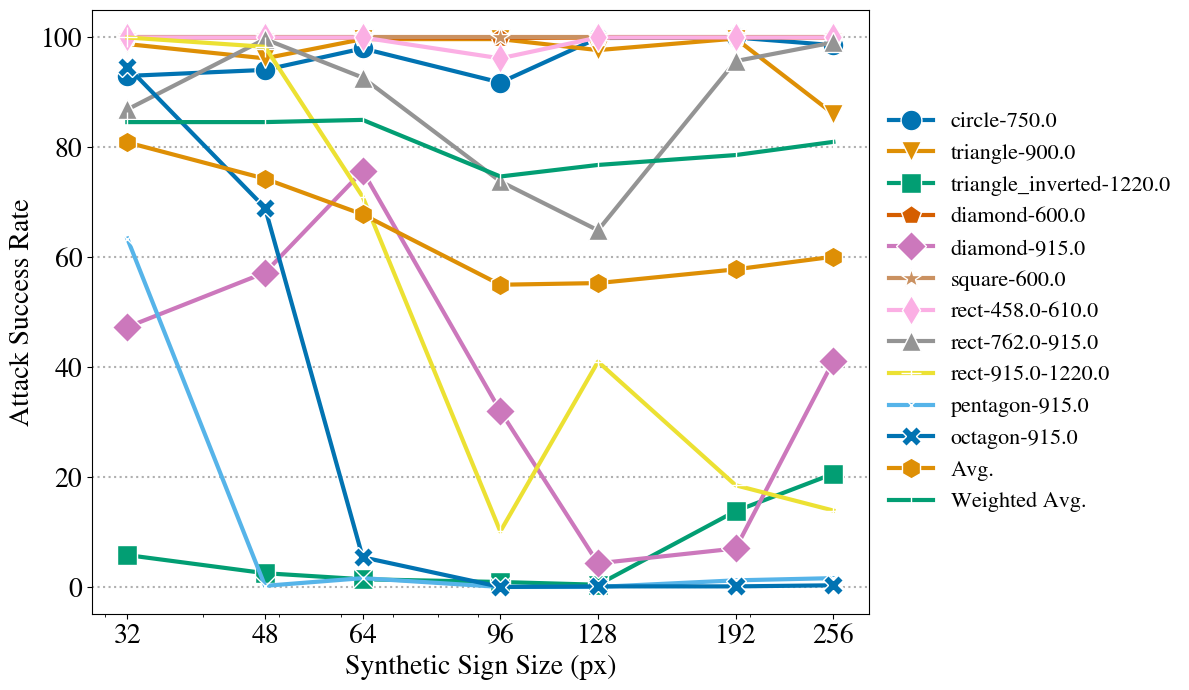

In [9]:
# 10x20
lw = 3
ms = 15
labelsize = 20
ticksize = 20
legendsize = 16

sr = {
    "32": [
        93.0,
        98.8,
        5.8,
        100.0,
        47.3,
        100.0,
        100.0,
        86.9,
        100.0,
        63.4,
        94.7,
        80.9,
        84.6,
    ],
    "48": [
        94.1,
        96.2,
        2.5,
        100.0,
        57.2,
        100.0,
        100.0,
        99.7,
        98.3,
        0.2,
        69.0,
        74.3,
        84.6,
    ],
    "64": [
        98.0,
        99.7,
        1.4,
        100.0,
        75.7,
        100.0,
        100.0,
        92.7,
        71.0,
        1.6,
        5.4,
        67.8,
        85.0,
    ],
    "96": [
        91.8,
        99.7,
        0.9,
        99.9,
        32.0,
        100.0,
        96.2,
        73.8,
        10.1,
        0.0,
        0.0,
        55.0,
        74.7,
    ],
    "128": [
        99.9,
        97.7,
        0.4,
        100.0,
        4.3,
        100.0,
        100.0,
        64.9,
        41.0,
        0.0,
        0.1,
        55.3,
        76.8,
    ],
    # "192": [
    #     100.0,
    #     99.8,
    #     13.8,
    #     100.0,
    #     7.0,
    #     100.0,
    #     100.0,
    #     95.7,
    #     18.5,
    #     1.2,
    #     0.1,
    #     57.8,
    #     78.6,
    # ],
    # "256": [
    #     98.6,
    #     86.1,
    #     20.6,
    #     100.0,
    #     41.1,
    #     100.0,
    #     100.0,
    #     99.1,
    #     13.9,
    #     1.6,
    #     0.3,
    #     60.1,
    #     81.0,
    # ],
}

plot_sr = {}
for i, label in enumerate(LABELS_WITH_AVG):
    plot_sr[label] = [srs[i] for y, srs in sr.items()]
# x_axis = list(sr.keys())
x_axis = [int(s) for s in sr.keys()]

fig, ax = plt.subplots(1, 1, figsize=(12, 7))

# fmtt = ['-o', '-v', 's', 'p', '-D', '-d']
for i, key in enumerate(plot_sr):
    fmti = fmt[i]
    c = color[i]
    alpha = 1
    # edge_c = matplotlib.colors.colorConverter.to_rgba('', alpha=1)
    marker_c = matplotlib.colors.colorConverter.to_rgba(c, alpha=alpha)
    plt.plot(
        x_axis,
        plot_sr[key],
        fmti,
        lw=lw,
        ms=ms,
        label=key,
        c=marker_c,
        markeredgewidth=1,
        markeredgecolor="white",
    )
# plt.plot([95.4], [0], '*', ms=ms, label='Normal', c=color[3])


ax.set_xscale("log")
# plt.xticks(fontsize=ticksize)
# ax.tick_params(axis='x', labelsize=ticksize)
ax.set_xticks(x_axis, labels=x_axis, fontsize=ticksize)
plt.yticks(fontsize=ticksize)
plt.xlabel(r"Synthetic Sign Size (px)", fontsize=labelsize)
plt.ylabel(r"Attack Success Rate", fontsize=labelsize)
# plt.ylim(25, 48)
# plt.xlim(70, 95)
plt.grid(linestyle="dotted", lw=lw / 2, axis="y")
# plt.title('Part-ImageNet', fontsize=labelsize)
plt.legend(
    prop={"size": legendsize},
    frameon=False,
    loc="center left",
    bbox_to_anchor=(1, 0.5),
)
from matplotlib.ticker import StrMethodFormatter, NullFormatter

ax.xaxis.set_major_formatter(StrMethodFormatter("{x:.0f}"))
ax.xaxis.set_minor_formatter(NullFormatter())
plt.tight_layout()
# plt.savefig('tradeoff_intro.png', dpi=400, bbox_inches='tight')
plt.show()


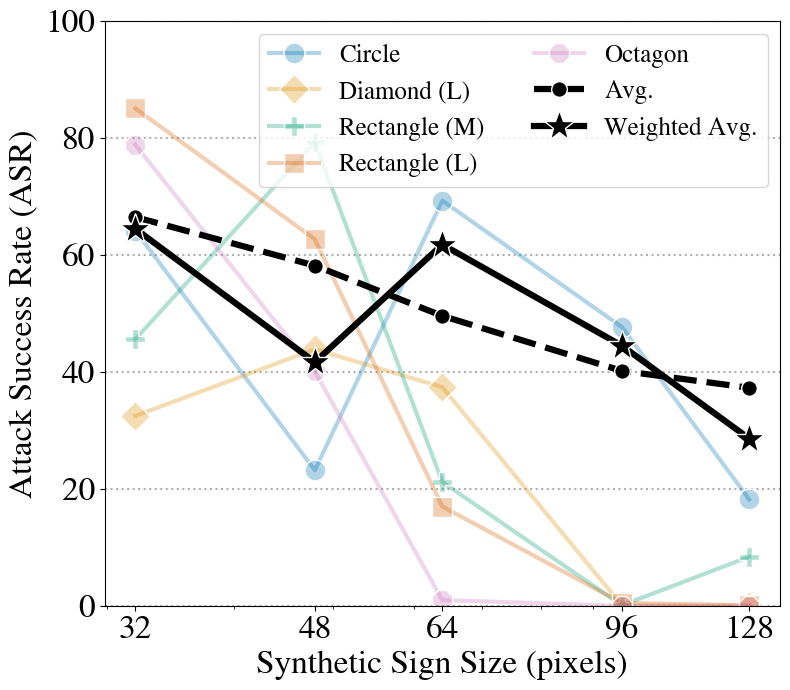

In [3]:
# 10x10
lw = 3
ms = 15
labelsize = 24
ticksize = 24
legendsize = 18


plot_sr = {}
idx_to_show = [0, 4, 7, 8, 10, 11, 12]
# idx_to_show = np.arange(len(LABELS_WITH_AVG))
for i, label in enumerate(LABELS_WITH_AVG):
    if i not in idx_to_show:
        continue
    plot_sr[label] = [srs[i] for y, srs in sr.items()]
# x_axis = list(sr.keys())
x_axis = [int(s) for s in sr.keys()]

fig, ax = plt.subplots(1, 1, figsize=(8, 7))

# fmtt = ['-o', '-v', 's', 'p', '-D', '-d']
for i, key in enumerate(plot_sr):
    fmt = MARKERS[key]
    if "Avg" in key:
        fmti = ("" if i % 2 == 0 else "-") + fmt
        c = "black"
        alpha = 1
        lwi = 1.5 * lw
        msi = 1.5 * ms
        # msi = ms
    else:
        fmti = fmt
        c = color[i]
        alpha = 0.3
        lwi = lw
        msi = ms
    # edge_c = matplotlib.colors.colorConverter.to_rgba('', alpha=1)
    marker_c = matplotlib.colors.colorConverter.to_rgba(c, alpha=alpha)
    plt.plot(
        x_axis,
        plot_sr[key],
        fmti,
        lw=lwi,
        ms=msi,
        label=key,
        c=marker_c,
        markeredgewidth=1,
        markeredgecolor="white",
    )
# plt.plot([95.4], [0], '*', ms=ms, label='Normal', c=color[3])


ax.set_xscale("log")
# plt.xticks(fontsize=ticksize)
# ax.tick_params(axis='x', labelsize=ticksize)
ax.set_xticks(x_axis, labels=x_axis, fontsize=ticksize)
plt.yticks(fontsize=ticksize)
plt.xlabel(r"Synthetic Sign Size (pixels)", fontsize=labelsize)
plt.ylabel(r"Attack Success Rate (ASR)", fontsize=labelsize)
plt.ylim(0, 100)
# plt.xlim(70, 95)
plt.grid(linestyle="dotted", lw=lw / 2, axis="y")
# plt.title('Part-ImageNet', fontsize=labelsize)
plt.legend(
    prop={"size": legendsize},
    frameon=True,
    ncol=2,
    # loc="center left",
    # bbox_to_anchor=(1, 0.5),
)
from matplotlib.ticker import StrMethodFormatter, NullFormatter

ax.xaxis.set_major_formatter(StrMethodFormatter("{x:.0f}"))
ax.xaxis.set_minor_formatter(NullFormatter())
plt.tight_layout()
plt.savefig("figures/syn_obj_size.pdf", dpi=400, bbox_inches="tight")
plt.show()


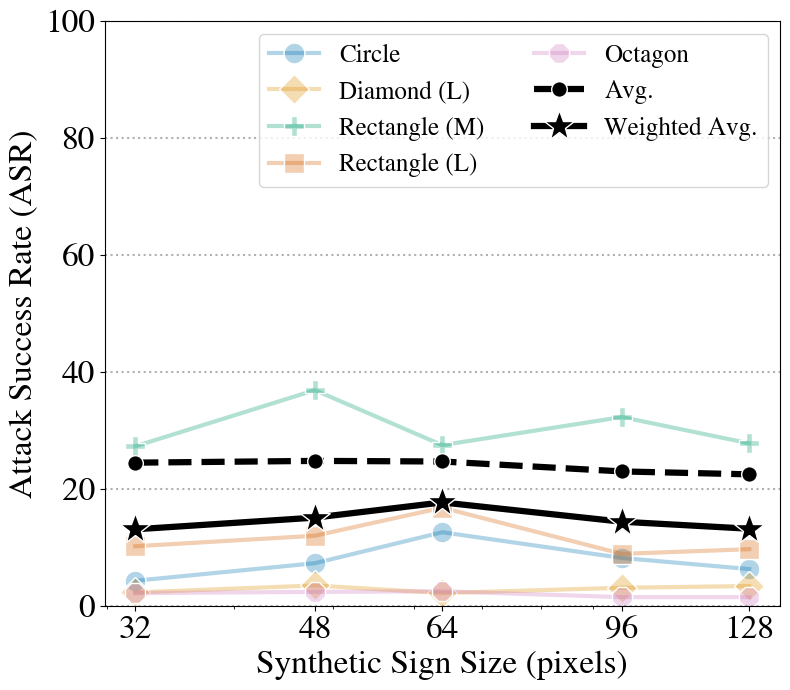

In [4]:
# 10x10 (real)
lw = 3
ms = 15
labelsize = 24
ticksize = 24
legendsize = 18

plot_sr = {}
idx_to_show = [0, 4, 7, 8, 10, 11, 12]
# idx_to_show = np.arange(len(LABELS_WITH_AVG))
for i, label in enumerate(LABELS_WITH_AVG):
    if i not in idx_to_show:
        continue
    plot_sr[label] = [srs[i] for y, srs in sr.items()]
# x_axis = list(sr.keys())
x_axis = [int(s) for s in sr.keys()]

fig, ax = plt.subplots(1, 1, figsize=(8, 7))

for i, key in enumerate(plot_sr):
    fmt = MARKERS[key]
    if "Avg" in key:
        fmti = ("" if i % 2 == 0 else "-") + fmt
        c = "black"
        alpha = 1
        lwi = 1.5 * lw
        msi = 1.5 * ms
    else:
        fmti = fmt
        c = color[i]
        alpha = 0.3
        lwi = lw
        msi = ms
    # edge_c = matplotlib.colors.colorConverter.to_rgba('', alpha=1)
    marker_c = matplotlib.colors.colorConverter.to_rgba(c, alpha=alpha)
    plt.plot(
        x_axis,
        plot_sr[key],
        fmti,
        lw=lwi,
        ms=msi,
        label=key,
        c=marker_c,
        markeredgewidth=1,
        markeredgecolor="white",
    )
# plt.plot([95.4], [0], '*', ms=ms, label='Normal', c=color[3])


ax.set_xscale("log")
# plt.xticks(fontsize=ticksize)
# ax.tick_params(axis='x', labelsize=ticksize)
ax.set_xticks(x_axis, labels=x_axis, fontsize=ticksize)
plt.yticks(fontsize=ticksize)
plt.xlabel(r"Synthetic Sign Size (pixels)", fontsize=labelsize)
plt.ylabel(r"Attack Success Rate (ASR)", fontsize=labelsize)
plt.ylim(0, 100)
# plt.xlim(70, 95)
plt.grid(linestyle="dotted", lw=lw / 2, axis="y")
# plt.title('Part-ImageNet', fontsize=labelsize)
plt.legend(
    prop={"size": legendsize},
    frameon=True,
    ncol=2,
    # loc="center left",
    # bbox_to_anchor=(1, 0.5),
)
from matplotlib.ticker import StrMethodFormatter, NullFormatter

ax.xaxis.set_major_formatter(StrMethodFormatter("{x:.0f}"))
ax.xaxis.set_minor_formatter(NullFormatter())
plt.tight_layout()
plt.savefig("figures/real_obj_size.pdf", dpi=400, bbox_inches="tight")
plt.show()


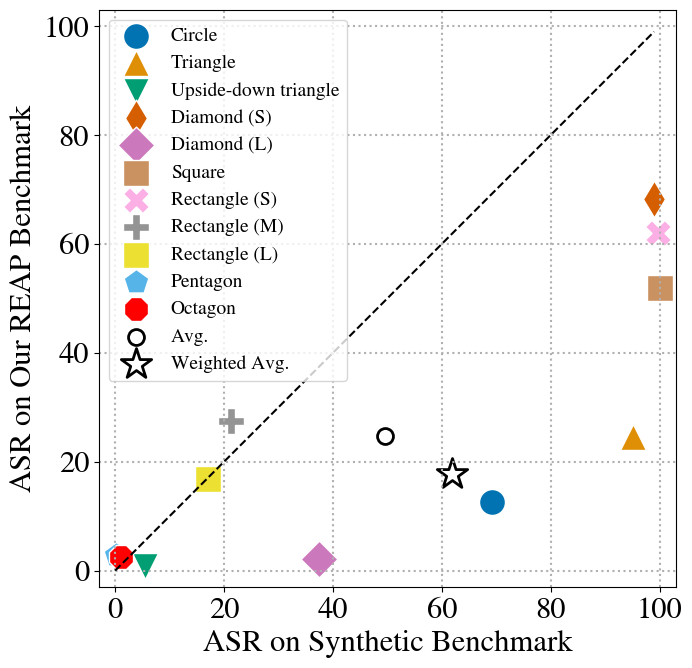

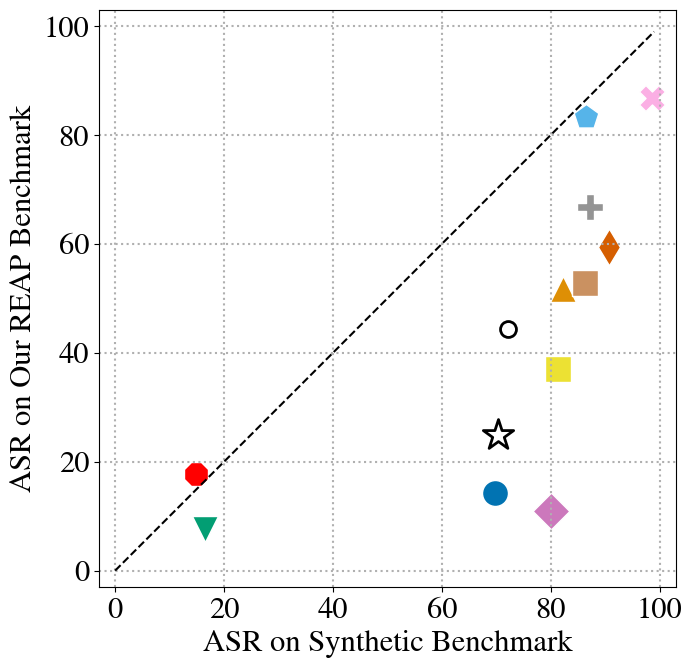

In [4]:
# 10x10 scattter

def plot_scatter(model_name, results, syn_name, real_name, legend=True,
                 ms=350, legendsize=14, sizes=None):
    lw = 3
    labelsize = 22
    ticksize = 22
    
    sr = results[syn_name]
    real_sr = results[real_name]
    if sizes is None:
        sizes = list(sr.keys())
    plot_sr = {}
    # idx_to_show = [0, 4, 7, 8, 10, 11, 12]
    idx_to_show = np.arange(len(LABELS_WITH_AVG))
    for i, label in enumerate(LABELS_WITH_AVG):
        if i not in idx_to_show:
            continue
        points_by_label = []
        for size in sizes:
            points_by_label.append((real_sr[size][i], sr[size][i]))
        plot_sr[label] = np.array(points_by_label)

    fig, ax = plt.subplots(1, 1, figsize=(7, 7))
    plt.axis("square")

    plt.plot(np.arange(100), np.arange(100), "--", lw=lw / 2, color="black")
    for i, key in enumerate(plot_sr):
        fmt = MARKERS[key]
        if "Avg" in key:
            fmti = ("" if i % 2 == 0 else "-") + fmt
            c = "black"
            alpha = 1
            lwi = 1.5 * lw
            msi = 1.5 * ms
            linewidths = 2
            edgecolors = "black"
            marker_c = "white"
        else:
            fmti = fmt
            c = color[i]
            alpha = 1
            lwi = lw
            msi = ms
            linewidths = 1
            edgecolors = "white"
            marker_c = matplotlib.colors.colorConverter.to_rgba(c, alpha=alpha)
        plt.scatter(
            plot_sr[key][:, 1],
            plot_sr[key][:, 0],
            marker=fmti.split("-")[-1],
            s=msi,
            label=key,
            color=marker_c,
            linewidths=linewidths,
            edgecolors=edgecolors,
        )

    plt.xticks(fontsize=ticksize)
    plt.yticks(fontsize=ticksize)
    plt.xlabel(r"ASR on Synthetic Benchmark", fontsize=labelsize)
    plt.ylabel(r"ASR on Our REAP Benchmark", fontsize=labelsize)
    plt.ylim(-3, 103)
    plt.xlim(-3, 103)
    plt.grid(linestyle="dotted", lw=lw / 2)
    if legend:
        plt.legend(
            prop={"size": legendsize},
            frameon=True,
            ncol=1,
            # loc="center left",
            # bbox_to_anchor=(1, 0.5),
        )
    plt.tight_layout()
    plt.savefig(f"scatter_10x10_{model_name}.pdf", dpi=400, bbox_inches="tight")
    plt.show()

plot_scatter("frcnn", results, "syn-syn-10x10-obj_size", "syn-real-10x10-obj_size", True, sizes=["64",])
plot_scatter("yolo", results_yolo, "syn-syn-10x10-obj_size", "real-real-10x10-obj_size", False, sizes=["64",])

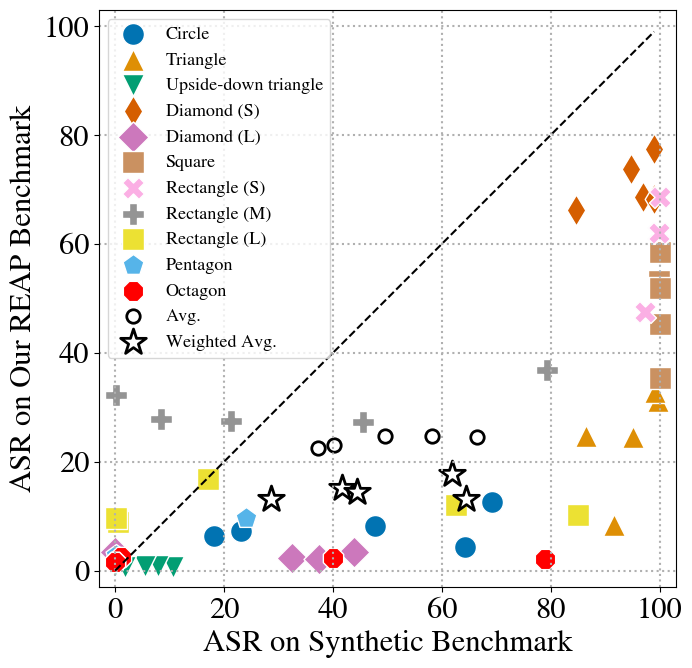

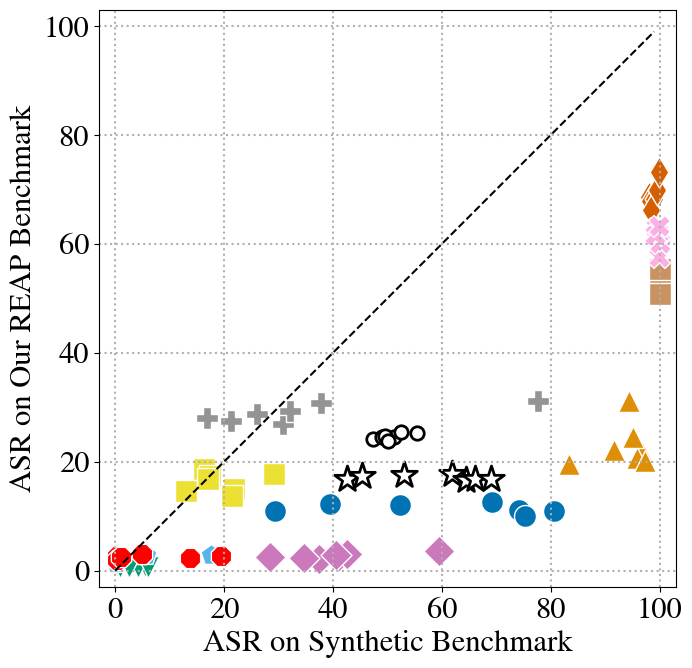

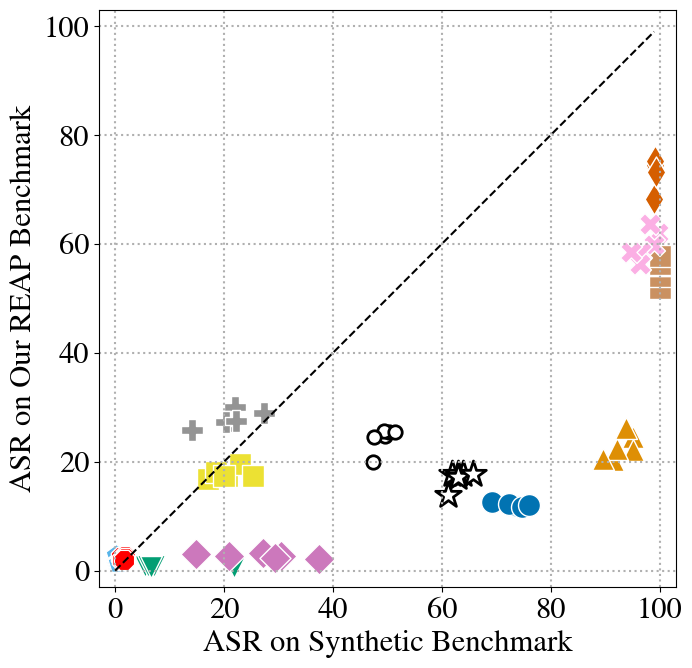

In [5]:
plot_scatter("frcnn_obj_size", results, "syn-syn-10x10-obj_size", "syn-real-10x10-obj_size", legend=True,
             ms=250, legendsize=13)
plot_scatter("frcnn_rt", results, "syn-syn-10x10-rt", "syn-real-10x10-rt", legend=False,
             ms=250, legendsize=13)
plot_scatter("frcnn_cj", results, "syn-syn-10x10-cj", "syn-real-10x10-cj", legend=False,
             ms=250, legendsize=13)

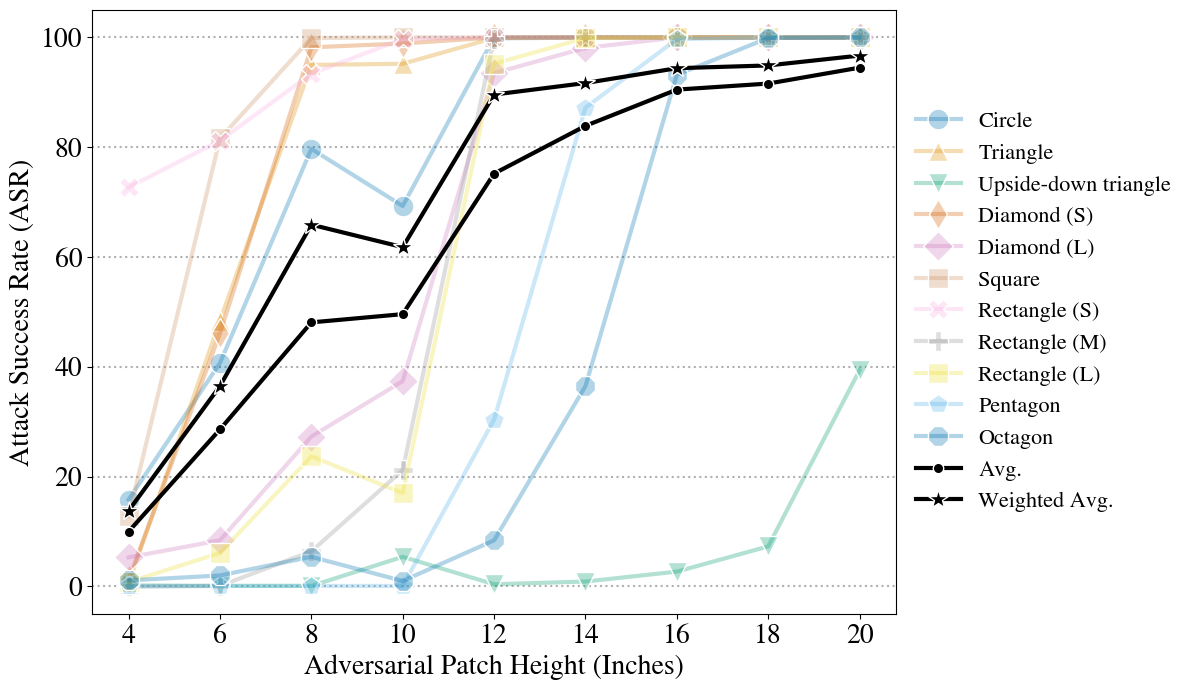

In [17]:
lw = 3
ms = 15
labelsize = 20
ticksize = 20
legendsize = 16


plot_sr = {}
for i, label in enumerate(LABELS_WITH_AVG):
    plot_sr[label] = [srs[i] for y, srs in sr.items()]
x_axis = [int(s) for s in sr.keys()]

fig, ax = plt.subplots(1, 1, figsize=(12, 7))

for i, key in enumerate(plot_sr):
    fmt = MARKERS[key]
    if "Avg" in key:
        fmti = ("" if i % 2 == 0 else "-") + fmt
        c = "black"
        alpha = 1
        lwi = 1.5 * lw
        msi = 1.5 * ms
    else:
        fmti = fmt
        c = color[i]
        alpha = 0.3
        lwi = lw
        msi = ms
    marker_c = matplotlib.colors.colorConverter.to_rgba(c, alpha=alpha)
    plt.plot(
        x_axis,
        plot_sr[key],
        fmti,
        lw=lw,
        ms=ms,
        label=key,
        c=marker_c,
        markeredgewidth=1,
        markeredgecolor="white",
    )

ax.set_xticks(x_axis, labels=x_axis, fontsize=ticksize)
plt.yticks(fontsize=ticksize)
plt.xlabel(r"Adversarial Patch Height (Inches)", fontsize=labelsize)
plt.ylabel(r"Attack Success Rate (ASR)", fontsize=labelsize)
# plt.ylim(25, 48)
# plt.xlim(70, 95)
plt.grid(linestyle="dotted", lw=lw / 2, axis="y")
plt.legend(
    prop={"size": legendsize},
    frameon=False,
    loc="center left",
    bbox_to_anchor=(1, 0.5),
)
from matplotlib.ticker import StrMethodFormatter, NullFormatter

ax.xaxis.set_major_formatter(StrMethodFormatter("{x:.0f}"))
ax.xaxis.set_minor_formatter(NullFormatter())
plt.tight_layout()
plt.savefig("figures/syn_patch_height.pdf", dpi=400, bbox_inches="tight")
plt.show()


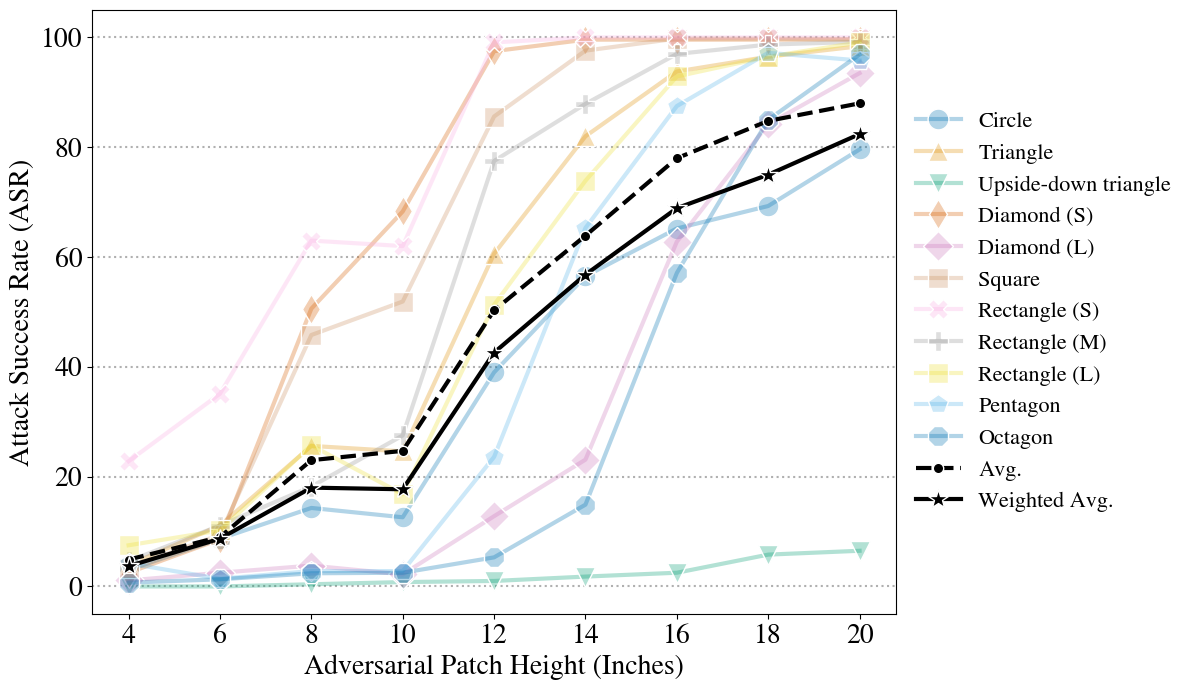

In [6]:
real_sr = {
    "4": [
        3.0,
        3.9,
        0.0,
        2.5,
        1.1,
        3.4,
        22.8,
        4.6,
        7.5,
        4.2,
        0.7,
        4.9,
        3.7,
    ],
    "6": [
        8.7,
        11.1,
        0.0,
        8.6,
        2.5,
        9.4,
        35.1,
        11.1,
        10.2,
        1.4,
        1.3,
        9.0,
        8.7,
    ],
    "8": [
        14.3,
        25.6,
        0.4,
        50.6,
        3.8,
        45.8,
        63.0,
        18.2,
        25.7,
        2.8,
        2.4,
        23.0,
        18.0,
    ],
    "10": [
        12.6,
        24.6,
        0.8,
        68.3,
        2.2,
        51.9,
        62.0,
        27.5,
        16.8,
        2.8,
        2.5,
        24.7,
        17.7,
    ],
    "12": [
        39.0,
        60.6,
        1.0,
        97.5,
        12.8,
        85.6,
        99.1,
        77.5,
        51.3,
        23.6,
        5.3,
        50.3,
        42.6,
    ],
    "14": [
        56.5,
        82.0,
        1.8,
        99.6,
        23.1,
        97.6,
        100.0,
        87.9,
        73.9,
        65.3,
        14.9,
        63.9,
        56.8,
    ],
    "16": [
        65.2,
        93.8,
        2.5,
        99.6,
        62.8,
        99.8,
        100.0,
        97.0,
        92.9,
        87.5,
        57.1,
        78.0,
        68.9,
    ],
    "18": [
        69.3,
        96.5,
        5.8,
        99.6,
        84.2,
        99.8,
        100.0,
        98.7,
        96.5,
        97.2,
        85.0,
        84.8,
        75.0,
    ],
    "20": [
        79.6,
        98.4,
        6.5,
        99.6,
        93.5,
        99.7,
        100.0,
        99.2,
        99.1,
        95.8,
        96.9,
        88.0,
        82.4,
    ],
}

plot_sr = {}
for i, label in enumerate(LABELS_WITH_AVG):
    plot_sr[label] = [srs[i] for y, srs in real_sr.items()]
x_axis = [int(s) for s in sr.keys()]

fig, ax = plt.subplots(1, 1, figsize=(12, 7))

for i, key in enumerate(plot_sr):
    fmt = MARKERS[key]
    if "Avg" in key:
        fmti = ("" if i % 2 == 0 else "-") + fmt
        c = "black"
        alpha = 1
        lwi = 1.5 * lw
        msi = 1.5 * ms
    else:
        fmti = fmt
        c = color[i]
        alpha = 0.3
        lwi = lw
        msi = ms
    marker_c = matplotlib.colors.colorConverter.to_rgba(c, alpha=alpha)
    plt.plot(
        x_axis,
        plot_sr[key],
        fmti,
        lw=lw,
        ms=ms,
        label=key,
        c=marker_c,
        markeredgewidth=1,
        markeredgecolor="white",
    )

ax.set_xticks(x_axis, labels=x_axis, fontsize=ticksize)
plt.yticks(fontsize=ticksize)
plt.xlabel(r"Adversarial Patch Height (Inches)", fontsize=labelsize)
plt.ylabel(r"Attack Success Rate (ASR)", fontsize=labelsize)
# plt.ylim(25, 48)
# plt.xlim(70, 95)
plt.grid(linestyle="dotted", lw=lw / 2, axis="y")
plt.legend(
    prop={"size": legendsize},
    frameon=False,
    loc="center left",
    bbox_to_anchor=(1, 0.5),
)
from matplotlib.ticker import StrMethodFormatter, NullFormatter

ax.xaxis.set_major_formatter(StrMethodFormatter("{x:.0f}"))
ax.xaxis.set_minor_formatter(NullFormatter())
plt.tight_layout()
plt.savefig("figures/real_patch_height.pdf", dpi=400, bbox_inches="tight")
plt.show()


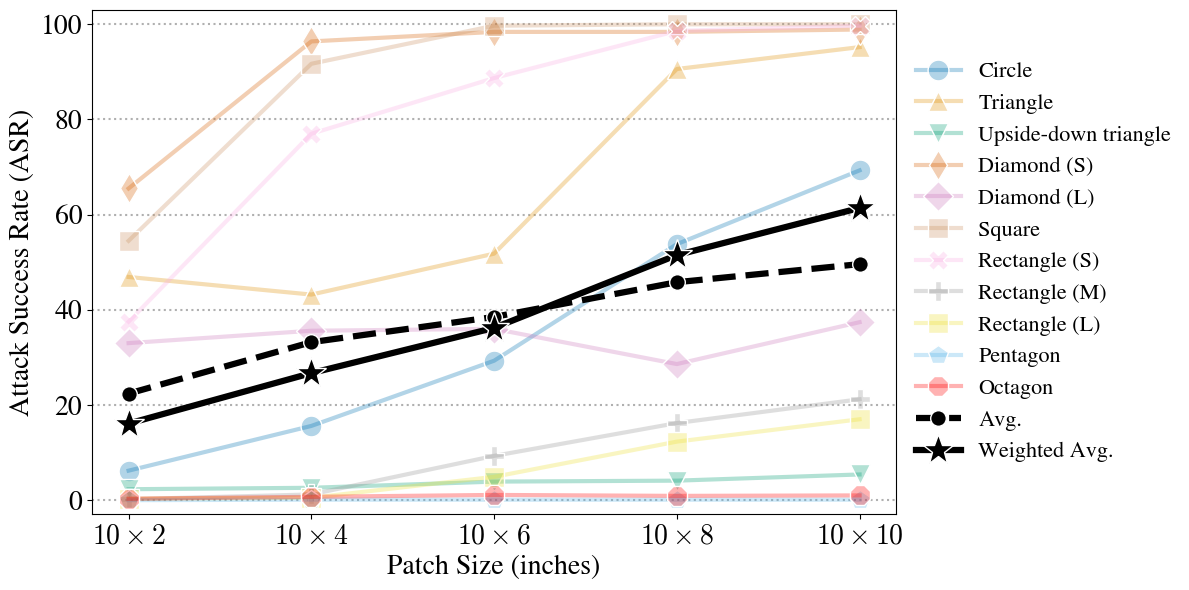

In [31]:
lw = 3
ms = 15
labelsize = 20
ticksize = 20
legendsize = 16

real_sr = {
    r"$10 \times 2$": [
        1.4,
        2.9,
        0.3,
        31.7,
        2.0,
        5.0,
        13.2,
        5.8,
        4.0,
        2.8,
        0.5,
        6.3,
        3.0,
    ],
    r"$10 \times 4$": [
        2.6,
        4.5,
        0.1,
        49.8,
        2.0,
        15.9,
        19.6,
        10.1,
        5.8,
        2.8,
        1.5,
        10.4,
        5.4,
    ],
    r"$10 \times 6$": [
        4.7,
        8.0,
        0.6,
        63.8,
        2.5,
        26.9,
        31.7,
        20.0,
        8.4,
        2.8,
        1.6,
        15.5,
        8.8,
    ],
    r"$10 \times 8$": [
        7.5,
        18.2,
        0.4,
        65.4,
        2.5,
        46.6,
        51.9,
        27.8,
        12.0,
        2.8,
        2.4,
        21.6,
        13.5,
    ],
    r"$10 \times 10$": [
        12.7,
        24.6,
        0.8,
        68.3,
        2.2,
        52.0,
        62.0,
        27.4,
        16.7,
        2.8,
        2.5,
        24.7,
        17.7,
    ],
}

sr_real = {
    r"$10 \times 2$": [
        6.2,
        46.9,
        2.3,
        65.5,
        33.0,
        54.5,
        37.5,
        0.2,
        0.3,
        0.0,
        0.3,
        22.4,
        15.7,
    ],
    r"$10 \times 4$": [
        15.6,
        43.2,
        2.6,
        96.4,
        35.6,
        91.7,
        77.0,
        1.2,
        0.5,
        0.1,
        0.7,
        33.2,
        26.3,
    ],
    r"$10 \times 6$": [
        29.3,
        51.8,
        3.9,
        98.4,
        36.0,
        99.7,
        88.7,
        9.3,
        4.9,
        0.1,
        1.1,
        38.5,
        36.0,
    ],
    r"$10 \times 8$": [
        53.8,
        90.6,
        4.1,
        98.4,
        28.6,
        100.0,
        98.6,
        16.2,
        12.3,
        0.1,
        0.9,
        45.8,
        51.6,
    ],
    r"$10 \times 10$": [
        69.3,
        95.2,
        5.4,
        98.9,
        37.4,
        100.0,
        99.7,
        21.2,
        17.0,
        0.1,
        1.0,
        49.6,
        61.8,
    ],
}

plot_sr = {}
for i, label in enumerate(LABELS_WITH_AVG):
    plot_sr[label] = [srs[i] for y, srs in sr.items()]
x_axis_labels = list(sr.keys())
x_axis = np.arange(len(x_axis_labels))

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

for i, key in enumerate(plot_sr):
    fmt = MARKERS[key]
    if "Avg" in key:
        fmti = ("" if i % 2 == 0 else "-") + fmt
        c = "black"
        alpha = 1
        lwi = 1.5 * lw
        msi = 1.5 * ms
    else:
        fmti = fmt
        c = color[i]
        alpha = 0.3
        lwi = lw
        msi = ms
    marker_c = matplotlib.colors.colorConverter.to_rgba(c, alpha=alpha)
    plt.plot(
        x_axis,
        plot_sr[key],
        fmti,
        lw=lwi,
        ms=msi,
        label=key,
        c=marker_c,
        markeredgewidth=1,
        markeredgecolor="white",
    )
ax.set_xticks(x_axis, labels=x_axis_labels, fontsize=ticksize)
plt.yticks(fontsize=ticksize)
plt.xlabel(r"Patch Size (inches)", fontsize=labelsize)
plt.ylabel(r"Attack Success Rate (ASR)", fontsize=labelsize)
plt.grid(linestyle="dotted", lw=lw / 2, axis="y")
plt.ylim(-3, 103)
plt.legend(
    prop={"size": legendsize},
    frameon=False,
    loc="center left",
    bbox_to_anchor=(1, 0.5),
)
plt.tight_layout()
plt.savefig('figures/syn_patch_width.pdf', dpi=400, bbox_inches='tight')
plt.show()

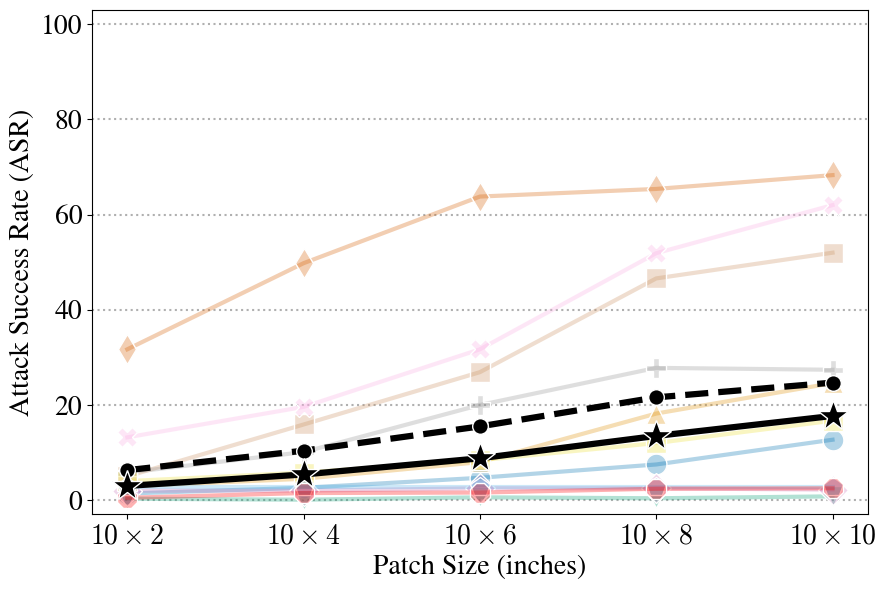

In [32]:
lw = 3
ms = 15
labelsize = 20
ticksize = 20
legendsize = 16
plot_sr = {}
for i, label in enumerate(LABELS_WITH_AVG):
    plot_sr[label] = [srs[i] for y, srs in real_sr.items()]
x_axis_labels = list(sr.keys())
x_axis = np.arange(len(x_axis_labels))

fig, ax = plt.subplots(1, 1, figsize=(9, 6))

for i, key in enumerate(plot_sr):
    fmt = MARKERS[key]
    if "Avg" in key:
        fmti = ("" if i % 2 == 0 else "-") + fmt
        c = "black"
        alpha = 1
        lwi = 1.5 * lw
        msi = 1.5 * ms
    else:
        fmti = fmt
        c = color[i]
        alpha = 0.3
        lwi = lw
        msi = ms
    marker_c = matplotlib.colors.colorConverter.to_rgba(c, alpha=alpha)
    plt.plot(
        x_axis,
        plot_sr[key],
        fmti,
        lw=lwi,
        ms=msi,
        label=key,
        c=marker_c,
        markeredgewidth=1,
        markeredgecolor="white",
    )
ax.set_xticks(x_axis, labels=x_axis_labels, fontsize=ticksize)
plt.yticks(fontsize=ticksize)
plt.xlabel(r"Patch Size (inches)", fontsize=labelsize)
plt.ylabel(r"Attack Success Rate (ASR)", fontsize=labelsize)
plt.ylim(-3, 103)
plt.grid(linestyle="dotted", lw=lw / 2, axis="y")
# plt.legend(
#     prop={"size": legendsize},
#     frameon=False,
#     loc="center left",
#     bbox_to_anchor=(1, 0.5),
# )
plt.tight_layout()
plt.savefig('figures/real_patch_width.pdf', dpi=400, bbox_inches='tight')
plt.show()

In [ ]:
base_dir = pathlib.Path("./detectron_output/")

path = base_dir / "no_patch"
for sign_path in path.iterdir():
    result_path = list(sign_path.glob("*/*.pkl"))[0]
    print(result_path)
    with open(result_path, "rb") as f:
        results = pickle.load(f)
    scores = results["bbox"]["gtScores"]
    break


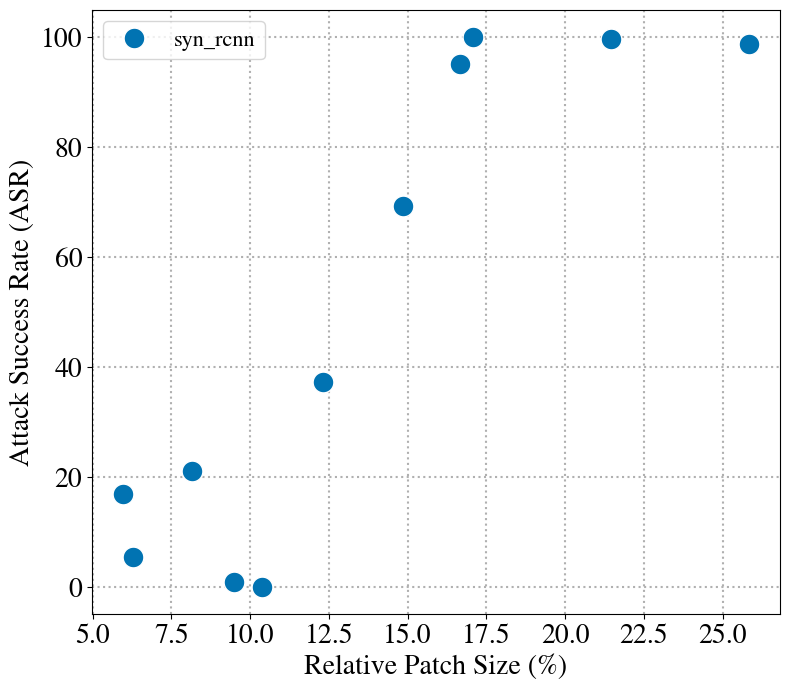

In [59]:
lw = 3
ms = 15
labelsize = 20
ticksize = 20
legendsize = 16

rel_sizes = np.array([0.1485874503850937,
0.1665329486131668,
0.06295032054185867,
0.25825515389442444,
0.12326311320066452,
0.17083649337291718,
0.21458177268505096,
0.08145793527364731,
0.05974894016981125,
0.10361966490745544,
0.09498680382966995,]) * 100

results = {
    "syn_rcnn": [
        69.3,
        95.2,
        5.4,
        98.9,
        37.4,
        100.0,
        99.7,
        21.2,
        17.0,
        0.1,
        1.0,
    ]
}


fig, ax = plt.subplots(1, 1, figsize=(8, 7))

i = 0
key = "syn_rcnn"
fmti = fmt[i].split("-")[-1]
c = color[i]
alpha = 1
lwi = lw
msi = ms
marker_c = matplotlib.colors.colorConverter.to_rgba(c, alpha=alpha)
plt.plot(
    rel_sizes,
    results[key],
    fmti,
    lw=lwi,
    ms=msi,
    label=key,
    c=marker_c,
    markeredgewidth=1,
    markeredgecolor="white",
)
# ax.set_xticks(x_axis, labels=x_axis_labels, fontsize=ticksize)
plt.xticks(fontsize=ticksize)
plt.yticks(fontsize=ticksize)
plt.xlabel(r"Relative Patch Size (%)", fontsize=labelsize)
plt.ylabel(r"Attack Success Rate (ASR)", fontsize=labelsize)
# plt.ylim(-3, 103)
plt.grid(linestyle="dotted", lw=lw / 2)
plt.legend(
    prop={"size": legendsize},
    # frameon=False,
    # loc="center left",
    # bbox_to_anchor=(1, 0.5),
)
plt.tight_layout()
plt.savefig('rel_sign_size.pdf', dpi=400, bbox_inches='tight')
plt.show()

In [14]:
import torchvision.transforms.functional as T

def resize_and_center(
    obj: torch.Tensor,
    img_size = None,
    obj_size = None,
    is_binary: bool = False,
    interp: str = "bicubic",
):
    """
    Resize object to obj_size and then place it in the middle of zero
    background.
    """
    if obj_size is not None:
        if is_binary or interp == "nearest":
            interp = T.InterpolationMode.NEAREST
        elif interp == "bicubic":
            interp = T.InterpolationMode.BICUBIC
        elif interp == "bilinear":
            interp = T.InterpolationMode.BILINEAR
        else:
            raise NotImplementedError(f"Interp {interp} not supported!")
        obj = T.resize(obj, obj_size, interpolation=interp)
    else:
        obj_size = obj.shape[-2:]

    if img_size is not None:
        # left, top, right, bottom
        left = torch.div(img_size[1] - obj_size[1], 2, rounding_mode="trunc")
        top = torch.div(img_size[0] - obj_size[0], 2, rounding_mode="trunc")
        pad_size = [
            max(0, left),  # left
            max(0, top),  # top
            max(0, img_size[1] - obj_size[1] - left),  # right
            max(0, img_size[0] - obj_size[0] - top),  # bottom
        ]
        obj = T.pad(obj, pad_size)

    return obj

In [46]:
# from hparams import TS_NO_COLOR_LABEL_LIST
# from adv_patch_bench.attacks.utils import resize_and_center
MAPILLARY_IMG_COUNTS_DICT = {
    "circle-750.0": 5325,
    "triangle-900.0": 548,
    "triangle_inverted-1220.0": 706,
    "diamond-600.0": 293,
    "diamond-915.0": 1195,
    "square-600.0": 729,
    "rect-458.0-610.0": 490,
    "rect-762.0-915.0": 401,
    "rect-915.0-1220.0": 333,
    "pentagon-915.0": 116,
    "octagon-915.0": 564,
}
TS_NO_COLOR_LABEL_LIST = list(MAPILLARY_IMG_COUNTS_DICT.keys())
import torchvision

mode = torchvision.io.ImageReadMode.RGB_ALPHA
sign_area = []
obj_masks = []
for l in TS_NO_COLOR_LABEL_LIST:
    path = str(pathlib.Path('/datadrive/chawins/adv-patch-bench/attack_assets/') / f"{l}.png")
    obj = torchvision.io.read_image(path, mode=mode) / 255
    obj_masks.append(obj[-1:])
    rel_area = obj[-1].sum() / (obj.shape[1] * obj.shape[2])
    sign_area.append(rel_area)

base = pathlib.Path('/datadrive/chawins/adv-patch-bench/detectron_output/synthetic-10x10-obj64-pd64-ld0.00001/')
for i, l in enumerate(TS_NO_COLOR_LABEL_LIST):
    path = str(base / l / 'patch_mask.png')
    adv_patch = torchvision.io.read_image(path, mode=mode)[0:1] / 255
    obj_mask = obj_masks[i]
    obj_mask = resize_and_center(obj_mask, obj_size=adv_patch.shape[1:], is_binary=True)
    frac = (obj_mask * adv_patch).sum() / obj_mask.sum()
    print(float(frac))
    # rel_area = adv_patch[-1].sum() / (255 * adv_patch.shape[1] * adv_patch.shape[2])
    # sign_area.append(rel_area)

0.1485874503850937
0.1665329486131668
0.06295032054185867
0.25825515389442444
0.12326311320066452
0.17083649337291718
0.21458177268505096
0.08145793527364731
0.05974894016981125
0.10361966490745544
0.09498680382966995


In [47]:
torch.unique(obj_mask)

tensor([0., 1.])